In [21]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ClipLoss device cuda


[autoreload of clip_sdf failed: Traceback (most recent call last):
  File "/opt/conda/envs/neural-sculpture/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/envs/neural-sculpture/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/conda/envs/neural-sculpture/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/opt/conda/envs/neural-sculpture/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/opt/conda/envs/neural-sculpture/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/opt/conda/envs/neural-sculpture/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in upda

In [22]:
import math

import numpy as np
from PIL import Image
from IPython.display import display, clear_output

from clip_sdf import SDFOptimizer, CLIPSDFConfig

In [23]:
optim_config = CLIPSDFConfig(
    learning_rate=0.01,
    batch_size=1,
    init_tolerance=-0.1,
    iters_per_res=10,
    max_iters_per_cam=8,
    camera=CLIPSDFConfig(
        max_num_cameras=16,
        init_num_cameras=8,
        mapping_span=2*math.pi,
        shuffle_order=False,
        mapping_type="sdfdiff",
        cam_scaler=8,
    ),
    loss=CLIPSDFConfig(
        image_loss_weight=1 / 1000,
        sdf_loss_weight=1 / 1000,
        lp_loss_weight=1 / 1000,
    ),
)


In [24]:
sdf_optimizer = SDFOptimizer(
    config=optim_config, 
    sdf_grid_res_list = [64], 
#     sdf_file_path="./sdf-grids/12140_Skull_v3_L2.npy",
    sdf_file_path="./sdf-grids/cat.npy",

)

In [52]:
coord = [18.33542332356351, 46.84751561112019, 44.28860300189207]
prompt="3D bunny rabbit mesh rendered with maya zbrush"

# CAT LOOKING TO THE RIGHT
camera = [163.49201446007132, 49.16123259975538, 29.21531134628944]
camera = [75.05887488447725, 22.2608802154394, 17.600608836014636]

# CAT LOOKING TO THE FRONT
# camera = [25.948963681808323, 45.819506502525705, -165.00673958267666]

In [53]:
camera = torch.tensor(camera).cuda() / 10

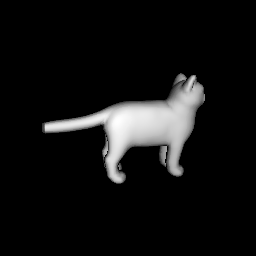

In [54]:
_grid = sdf_optimizer.optimize_coord(prompt, coord, camera_angle_list = [camera])

In [7]:
import torch
import os
torch.save(sdf_optimizer.grid, os.path.join(sdf_optimizer.results_dir, "grid.pt"),)

In [8]:
import os
from IPython.display import Video

In [9]:
sdf_optimizer.generate_visualizations()

Generating ./experiments/coord-2003/visualizations/generation.mp4
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.0643, device='cuda:0', grad_fn=<MaxBackward1>)
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.0727, device='cuda:0', grad_fn=<MaxBackward1>)
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.0852, device='cuda:0', grad_fn=<MaxBackward1>)
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.1008, device='cuda:0', grad_fn=<MaxBackward1>)


ffmpeg version 4.1.6-1~deb10u1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version='1~deb10u1' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --

MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.1118, device='cuda:0', grad_fn=<MaxBackward1>)
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.1343, device='cuda:0', grad_fn=<MaxBackward1>)
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.1586, device='cuda:0', grad_fn=<MaxBackward1>)
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.2018, device='cuda:0', grad_fn=<MaxBackward1>)
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.2331, device='cuda:0', grad_fn=<MaxBackward1>)
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.2900, device='cuda:0', grad_fn=<MaxBackward1>)
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING tensor(1.3612, device='cuda:0', grad_fn=<MaxBackward1>)
MIN SHADING tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
MAX SHADING 

ffmpeg version 4.1.6-1~deb10u1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version='1~deb10u1' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --

In [10]:
Video(os.path.join(sdf_optimizer.results_dir, "visualizations", 'generation.mp4'))

In [11]:
Video(os.path.join(sdf_optimizer.results_dir, "visualizations", 'visualization.mp4'))

In [12]:
http_url = "http://35.230.37.149:8001/"
generation_file_path = os.path.join(sdf_optimizer.results_dir, "visualizations", 'generation.mp4')
visualization_file_path = os.path.join(sdf_optimizer.results_dir, "visualizations", 'visualization.mp4')

In [13]:
print(http_url + generation_file_path[2:])
print(http_url + visualization_file_path[2:])

http://35.230.37.149:8001/experiments/coord-2003/visualizations/generation.mp4
http://35.230.37.149:8001/experiments/coord-2003/visualizations/visualization.mp4
